# Задание 01

## Тарасюк Юлия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx 

Будем работать с сетью, описывающую взаимосвязи между различными заболеваниями, подробнее про данные можно почитать в [статье](https://www.pnas.org/content/pnas/104/21/8685.full.pdf).

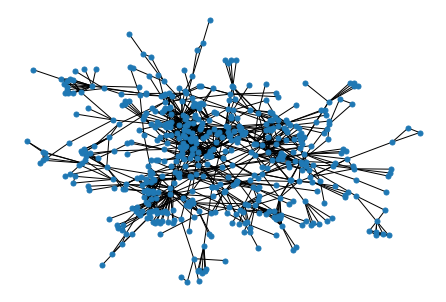

In [2]:
G=nx.read_edgelist('bio-diseasome.txt', nodetype=int)
pos=nx.spring_layout(G,iterations=20)
nx.draw(G,pos,node_size=25,with_labels=False)

## Ответьте на следующие вопросы, ответы введите используя [гугл-форму](https://goo.gl/forms/MLAvh3oe0VN6B9fJ3)

#### 1. Чему равно число вершин, число ребер в сети? 

In [316]:
print(nx.number_of_nodes(G)) 
print(nx.number_of_edges(G))

516
1188


#### 2. Является ли сеть направленной? 

In [4]:
nx.is_directed(G)

False

#### 3. Чему равна средняя степень вершины?  

In [5]:
degrees = np.array([d for _, d in G.degree()])
print(np.mean(degrees))

4.604651162790698


#### 4. Перечислите индексы узлов с максимальным значением степени.  

In [275]:
for (k, v) in dict(G.degree).items():
    if v == np.max(degrees):
        print(k)   

93


#### 5. Постройте распределение по степеням связности и огибающую распределения в двойном логарифмическом масштабе. 
Не забудьте подписать оси. Используйте plt.subplots, чтобы получить одну картинку. Картинку сохраните в формате "Фамилия05.png"

In [7]:
import seaborn as sns

Text(0, 0.5, 'P(k)')

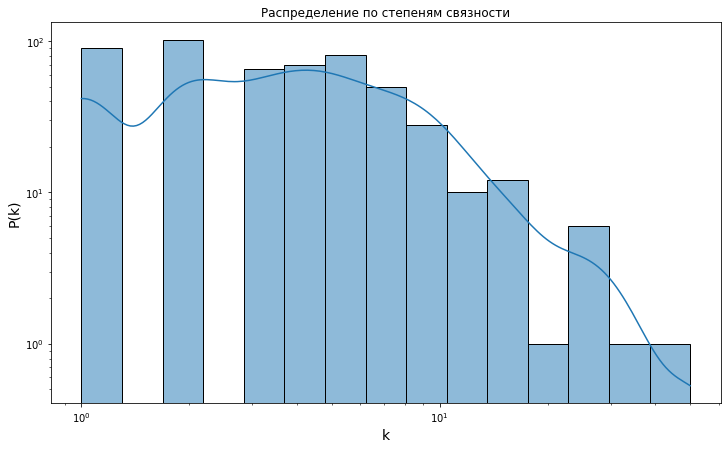

In [315]:
plt.figure(figsize=(12, 7))
plt.title('Распределение по степеням связности')
plt.yscale('log')
plt.xscale('log')
sns.histplot(x=degrees, kde=True)
plt.xlabel('k',fontsize=14)
plt.ylabel('P(k)',fontsize=14)

#### 6. Сколько вершин имеют степень больше 20? 

In [47]:
np.sum(degrees > 20)

8

#### 7. Напишите функцию sorted_degree(). 
Функция сортирует пары (index_node, degree) по значению степени в убывающем порядке. 
Выведите топ-10 вершин с наибольшей степенью. 

In [282]:
from operator import itemgetter

def sorted_degree():
    degree = dict(G.degree())
    return sorted(degree.items(), key=itemgetter(1, 0), reverse = True)

In [283]:
item_sort = sorted_degree()
for count in range(10):
    print(item_sort[count])    

(93, 50)
(71, 30)
(163, 27)
(457, 26)
(252, 26)
(113, 25)
(121, 24)
(357, 23)
(389, 20)
(399, 16)


In [284]:
item_sort = sorted_degree()
print(*map(lambda x: x[0], item_sort[:10])) 

93 71 163 457 252 113 121 357 389 399


#### 8. Сколько всего треугольников в сети? 

In [317]:
print(sum(nx.triangles(G).values())/3) # без повторений

1360.0


#### 9. Чему равен средний коэффициент кластеризации в сети? (ответ округлите до сотых)

In [140]:
print(round(nx.average_clustering(G),2))

0.64


#### 10. А чему равен коэффициент транзитивности сети? (ответ округлите до сотых)
Если он меньше или больше среднего коэффициента кластеризации, подумайте, что это может означать. 

In [287]:
print(round(nx.transitivity(G),2))

0.43


#### 11. Сколько процентов узлов из имеющих максимальную кластеризацию имеют степень два (т.е. являются вершинами треугольников)? (ответ округлите до целого)

In [135]:
list_key1 = [k for k, v in nx.clustering(G).items() if v == 1]
list_power = [k for k, v in dict(G.degree(list_key1)).items() if v == 2]
print(round(len(list_power)/len(list_key1)*100))

36


#### 12. Какова максимальная степень вершины с  минимальной кластеризацией ($C_i=0$)?

In [119]:
# для самопроверки
clust = sorted(nx.clustering(G).items(), key=itemgetter(1, 0))

In [120]:
list_key0 = [k for k, v in nx.clustering(G).items() if v == 0]
#print(list_key0)

In [121]:
max(dict(G.degree(list_key0)).values())  

5

#### 13. Какова кластеризация хаба (вершины с максимальной степенью)? (ответ округлите до сотых)

In [288]:
print(f'{nx.clustering(G, 93):.2f}')

0.12


#### 14. Постройте диаграмму рассеяния, по оси $Ox$ - значение степени узла, по оси $Oy$ - его коэффициент кластеризации. 
Картинку сохраните в формате "Фамилия14.png"

Text(0, 0.5, 'коэффициент кластеризации')

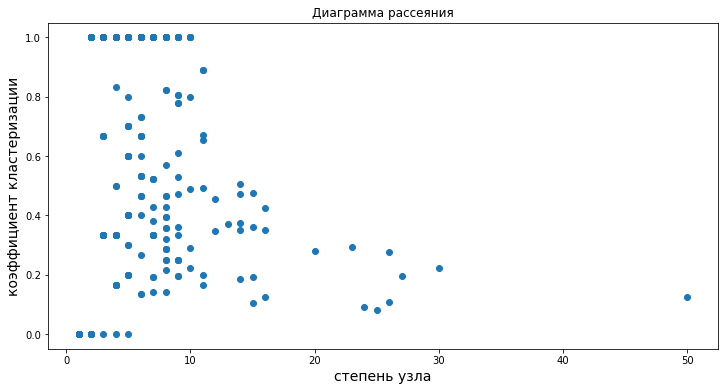

In [309]:
plt.figure(figsize=(12, 6))
plt.title('Диаграмма рассеяния')
clustering = nx.clustering(G).values()
plt.scatter(degree.values(), clustering)
plt.xlabel('cтепень узла',fontsize=14)
plt.ylabel('коэффициент кластеризации',fontsize=14)

#### 15. Верно ли, что все узлы с кластеризацией, превышающей среднее значение, имеют степень меньше 16?

In [172]:
average = nx.average_clustering(G)
degree_values = list(degree.values())
cluster_list = list(nx.clustering(G).values())
for i in range(len(clustering)):
    if cluster_list[i] > average:
        if degree_values[i] >= 16:
            break
else:
    print('Верно')

Верно


#### 16. Чему равен средний кратчайший путь в сети? (ответ округлите до десятых)

In [289]:
print(f'{nx.average_shortest_path_length(G):.1f}')

6.5


#### 17. А чему равен средний путь от хаба до всех остальных вершин? (ответ округлите до десятых)

In [291]:
average_path = [nx.shortest_path_length(G,93,i) for i in degree]
print(f'{np.average(average_path):.1f}')

4.4


#### 18. Чему равен диаметр сети? 

In [123]:
print(nx.diameter(G))

15


#### 19. Между какой парой вершин (i,j) ($i\ne j$) число путей длины 4 наибольшее? 

In [302]:
G1 = nx.adjacency_matrix(G)
A = G1.todense()
res = np.linalg.matrix_power(A, 4)
np.fill_diagonal(res, -1)
max_value = res.max()

In [301]:
# индексы в системе
ind = np.unravel_index(np.argmax(res, axis=None), res.shape)
print(ind)

(55, 57)


In [300]:
print(list(G.nodes())[ind[0]], list(G.nodes())[ind[1]])

71 93


#### 20. Визуализация сети. 
Представьте структуру сети на ваше усмотрение. Например, можно воспользоваться nx.draw, изменив параметры отрисовки. Можно размер (цвет) вершин сделать зависимым от некоторой топологической характеристики сети (степень, кластеризация и т.п.)  

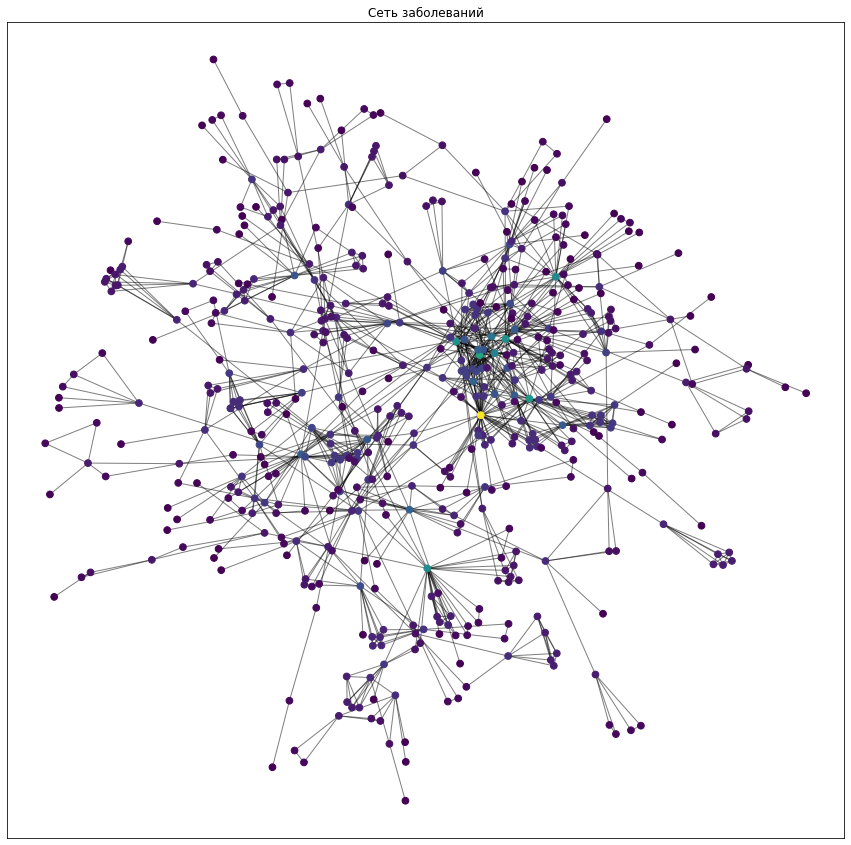

In [308]:
pos = nx.spring_layout(G, iterations=20)
plt.figure(figsize=(15, 15))
plt.title('Сеть заболеваний')
nx.draw_networkx_nodes(G, pos, degree.keys(), node_size=45, node_color=list(degree.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()